 Olá Hype, os membros dessa dupla são Eduardo Almeida e Enrico Aranha.

 Escolhemos o dataset do Titanic para testarmos a hipótese de que os fatores de classe social e econômica influenciaram na probabilidade de alguma pessoa que esteve no acidente sobrevivesse.

 Inicialmente importamos as bibliotecas que utilizaremos e utilizamos df.head() para darmos uma olhada inicial no dataset.

 Nossa variável alvo portanto será 'Survived', e faremos uma análise geral sobre todo dataset, tentando achar possiveis relações entre variáveis dos passageiros como classe, sexo, idade, etc. com a sobrevivência do passageiros.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# carregamos os dados e usamos o df.head() para fazer uma verificacao inicial
df = pd.read_csv('train.csv')
df.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


Antes de começamos a fazer a plotagens e análise das variáveis, nos é conveniente averiguar se existem dados faltantes no dataset, e como podemos ver, 'Age' e 'Cabin' possuem uma quantidade considerável de dados faltantes, portanto qualquer análise feita envolvendo essas variáveis devem serem levadas com cautela.



Dados faltantes por coluna:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2


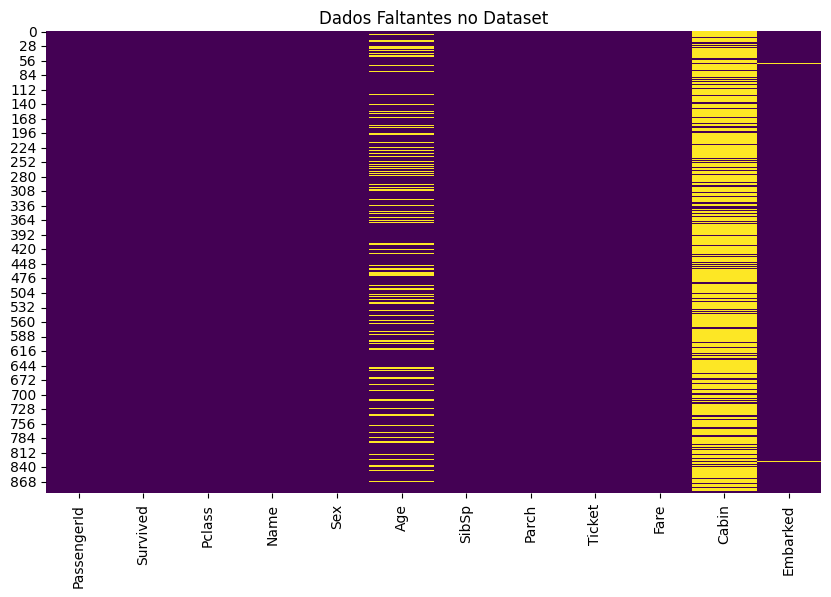

In [ ]:
# Verificamos dados faltantes
print("\nDados faltantes por coluna:")
print(df.isnull().sum().to_string())

# Heatmap de dados faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Dados Faltantes no Dataset")
plt.show()

Como idade é um dos fatores que iremos analisar bastante, iremos preencher os dados faltantes de 'Age' com a mediana por grupo, algo que é estatisticamente razoável e evita distorções.

In [ ]:
df['Age'] = df.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

Analisando agora as medidas descritivas das variáveis:

In [ ]:
# Medidas descritivas para variáveis numéricas
print("Resumo estatístico das variáveis numéricas:\n")
display(df[['Age', 'Fare', 'SibSp', 'Parch']].describe())

# Medidas descritivas para variáveis categóricas
print("\nDistribuição das variáveis categóricas:\n")

# Sexo
print("Sexo:")
print(df['Sex'].value_counts())
print("\nProporção por sexo:")
print(df['Sex'].value_counts(normalize=True).round(2))

# Classe
print("\nClasse (Pclass):")
print(df['Pclass'].value_counts())
print("\nProporção por classe:")
print(df['Pclass'].value_counts(normalize=True).round(2))

# Embarque
print("\nPorto de embarque (Embarked):")
print(df['Embarked'].value_counts())
print("\nProporção por porto de embarque:")
print(df['Embarked'].value_counts(normalize=True).round(2))

# Sobrevivência
print("\nSobreviventes (Survived):")
print(df['Survived'].value_counts())
print("\nProporção de sobreviventes:")
print(df['Survived'].value_counts(normalize=True).round(2))


Resumo estatístico das variáveis numéricas:



,Age,Fare,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000
mean,29.112424,32.204208,0.523008,0.381594
std,13.304424,49.693429,1.102743,0.806057
min,0.420000,0.000000,0.000000,0.000000
25%,21.500000,7.910400,0.000000,0.000000
50%,26.000000,14.454200,0.000000,0.000000
75%,36.000000,31.000000,1.000000,0.000000
max,80.000000,512.329200,8.000000,6.000000



Distribuição das variáveis categóricas:

Sexo:
Sex
male      577
female    314
Name: count, dtype: int64

Proporção por sexo:
Sex
male      0.65
female    0.35
Name: proportion, dtype: float64

Classe (Pclass):
Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Proporção por classe:
Pclass
3    0.55
1    0.24
2    0.21
Name: proportion, dtype: float64

Porto de embarque (Embarked):
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Proporção por porto de embarque:
Embarked
S    0.72
C    0.19
Q    0.09
Name: proportion, dtype: float64

Sobreviventes (Survived):
Survived
0    549
1    342
Name: count, dtype: int64

Proporção de sobreviventes:
Survived
0    0.62
1    0.38
Name: proportion, dtype: float64


Conseguimos extrair bastante coisa:

Age:

O Titanic tinha uma população majoritariamente jovem a adulta (média 29 anos), porém havia uma boa variação de idades (desvio padrão de 13,3 anos), com o navio contendo bebês e idosos também.

Fare:

A diferença de preço da tarifa (Fare) é muito grande (desvio padrão de 49,69), a  mediana foi 14.45, indicando que a maioria pagou tarifas baixas, enquanto o máximo pago chegou a ser 512, isso reflete uma desigualdade econômica considerável entre os passageiros.

SibSp/Parch:

Em relação ao número de irmãos/cônjuges (SibSp) e pais/filhos (Parch) a mediana foi 0 e a média 0,52, indicando que muitos viajavam sozinhos, porém com o max de SibSp sendo 8 e Parch sendo 6, isso indica que alguns passageiros tinham até 8 irmãos/cônjuges ou 6 filhos/pais, logo havia famílias inteiras a bordo do Titanic.

Sex:

Havia quase o dobro de homens no navio em relação a mulheres (65% homens x 35% mulheres).

Pclass:

A maioria dos passageiros era de classe baixa.

Embarked:

S era o principal ponto de embarque.

Survived (nossa variável alvo):

A mortalidade foi alta (38% sobreviveram x 62% faleceram).

A seguir, temos uma tira da matriz de correlação (usando o coeficiente de Pearson) entre todas as variáveis. Nessa tira, vemos apenas a relação entre a variável 'Survived' com todas as outras, lembrando que quanto mais próximo de 1 ou -1 maior a correlação (que pode ser negativa ou postiva) e quanto mais próximo de 0 menor a correlação.

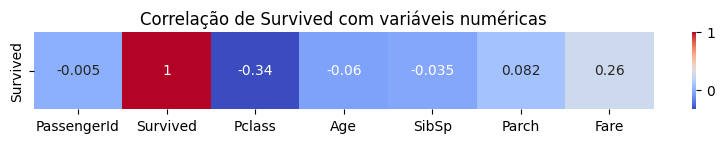

In [ ]:
# Pegamos a matriz de correlação levando em conta apenas variáveis numéricas
corr = df.corr(numeric_only=True)

# Seleciona apenas a linha 'Survived'
survived_corr = corr.loc[['Survived']]

# Cria o heatmap da linha da matriz de correlação
plt.figure(figsize=(10, 1)) # Tamanho pequeno pra ficar melhor como linha única
sns.heatmap(survived_corr, annot=True, cmap="coolwarm",cbar=True)
plt.title('Correlação de Survived com variáveis numéricas')
plt.show()

Esse heatmap nos mostra que as variáveis com maior correlação com o alvo 'Survived' são:

1. Pclass: Classe Social
2. Fare: Preço da passagem
3. Parch: Pais e filhos
4. Age: Idade dos passageiros


Com isso temos pistas de quais variáveis investigar em busca de insights em relação ao alvo 'Survived'.

Plotagem da quantidade de pessoas que morreram e a quantidade das pessoas que sobreviveram.

Como haviamos visto anteriomente, a maioria infelizmente faleceu.

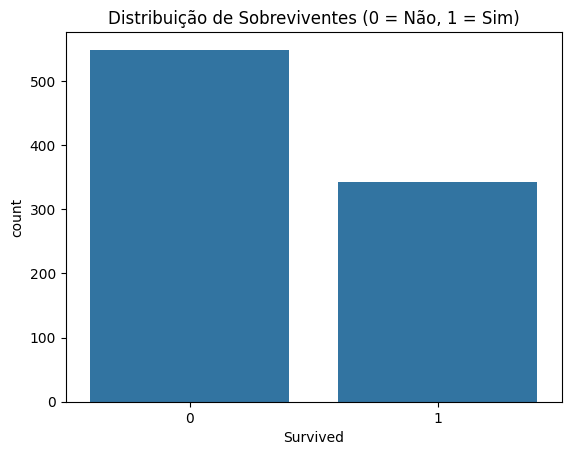

In [ ]:
# Ver a distribuição de sobreviventes, quantos % viveram/morreram
sns.countplot(x='Survived', data=df)
plt.title("Distribuição de Sobreviventes (0 = Não, 1 = Sim)")
plt.show()

Analisamos agora a quantidade de pessoas que sobreviveram ou morreram pelo Sexo, e como pode ser visto, as mulheres tiveram uma taxa de sobrevivência maior que a dos homens.



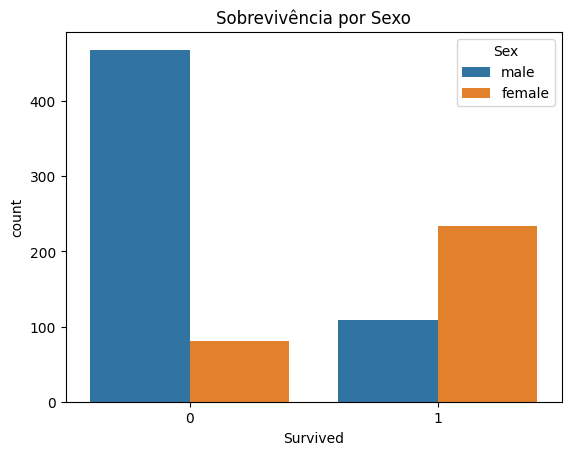

        Morreram  Sobreviveram  Total  % Sobrevivência
Sexo                                                  
female        81           233    314             74.2
male         468           109    577             18.9
Total        549           342    891             38.4


In [ ]:
# % de mulheres e homens que morreram/sobreviveram
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Sobrevivência por Sexo")
plt.show()
survival_table = pd.crosstab(
    index=df['Sex'],
    columns=df['Survived'],
    margins=True,  # Adiciona totais
    margins_name="Total"
)
# Renomear colunas para melhor interpretação
survival_table.columns = ['Morreram', 'Sobreviveram', 'Total']
survival_table.index.name = 'Sexo'

# Adicionar coluna de porcentagem de sobrevivência
survival_table['% Sobrevivência'] = (survival_table['Sobreviveram'] / survival_table['Total'] * 100).round(1)

print(survival_table)

Anteriormente, haviamos visto que mais homens do que mulheres no navio (577 homens e 314 mulheres, somando 891 pessoas no total, com os homens compondo aproximadamente 65% do total e as mulheres 35%), mas mesmo levando tal coisa em consideração, a taxa de sobrevivência das mulheres foi de 74,2% (233/314), cerca de quase 4 vezes superior à homens, que foi de 18,9% (109/577), o que demonstra que houve uma priorização para o salvamento das mulheres, mesmo os homens sendo a maioria no navio.

A seguir, através do gráfico e das porcentagens, podemos ver uma relação entre a sobrevivência e as classes.



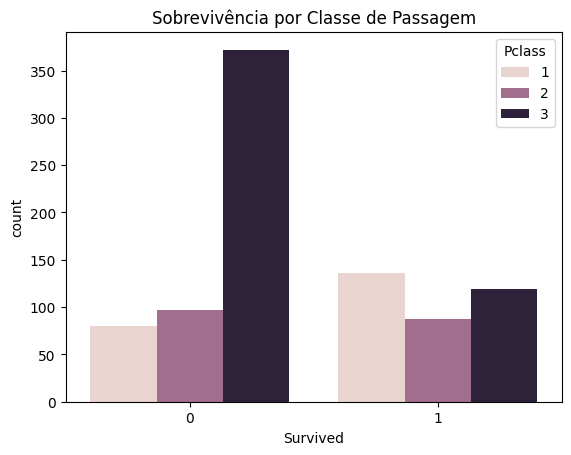

Pclass
1    63.0
2    47.3
3    24.2
Name: Survived, dtype: float64


In [ ]:
# Distribuição de sobreviventes por classe
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title("Sobrevivência por Classe de Passagem")
plt.show()
survival_rate = (df.groupby('Pclass')['Survived'].mean() * 100).round(1)
print(survival_rate)

Pessoas de classe melhores tiveram taxas de sobrevivências melhores, logo a classe social foi um fator decisivo na sobrevivência, com pessoas da classe 1 tendo cerca 2,5x mais chances de sobreviver do que pessoas da classe 3.

Esse gráfico ajuda a mostrar aquilo que observamos anteriomente, a classe 3 era a maioria no navio, sendo maior que a soma das classes 1 e 2 (como pode ser visto pelo tamanho barra da Pclass 3).

<Axes: xlabel='Pclass', ylabel='count'>

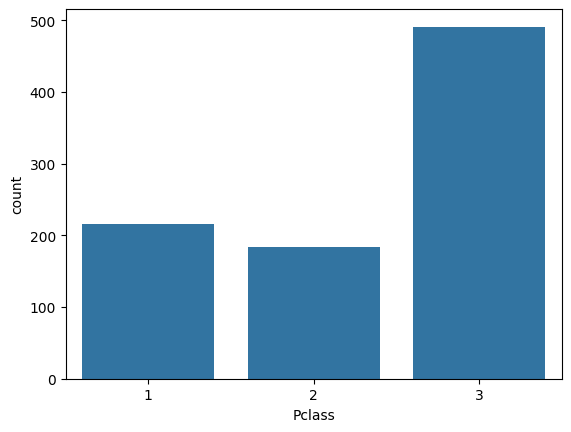

In [ ]:
# Número de pessoas por classe
sns.countplot(x='Pclass', data=df)

Podemos ver também que no geral havia mais pessoas com a faixa etária entre 20-30 anos, sendo esse o pico principal, com a cauda longa do gráfico ficando para passageiros com mais 60 anos.

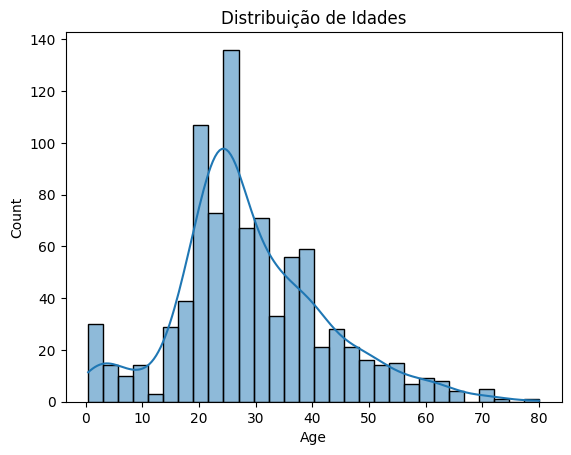

In [ ]:
# Distribuição de idades dos passageiros
sns.histplot(df['Age'].dropna(), kde=True, bins=30)
plt.title("Distribuição de Idades")
plt.show()

Aqui neste gráfico podemos observar mais claramente a relação entre a idade e a sobrevivência.



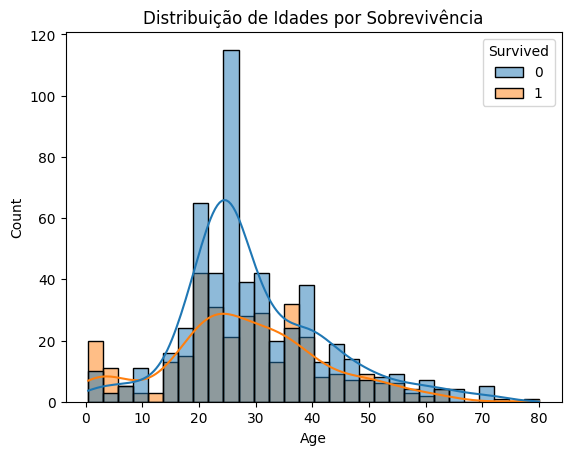

In [ ]:
# Distribuição de sobreviventes por idade
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True)
plt.title("Distribuição de Idades por Sobrevivência")
plt.show()

Pessoas com menos de 10 anos tiveram o pico de sobrevivência, enquanto pessoas de 20-30 anos tiveram o pico de mortes.

Também é possível notar que pessoas mais de 60 anos, que estavam em pouca quantidade como podemos ver no gráfico anterior, também tiveram uma baixa taxa de sobrevivência.

Aqui separamos as faixas etárias em categorias:

Criança: 0-12 anos

Adolescente: 13-18 anos

Adulto: 19-50 anos

Idoso: 51-80 anos



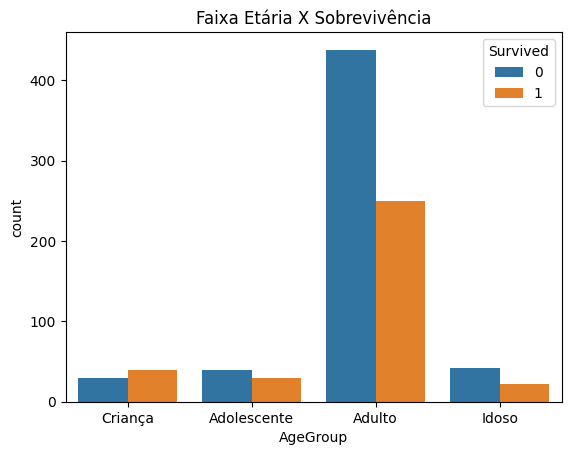

In [ ]:
# Faz uma cópia do banco de dados e adiciona a coluna AgeGroup que contem a faixa etária dos passageiros
df_age_groups = df.copy()
df_age_groups['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 50, 80], labels=['Criança', 'Adolescente', 'Adulto', 'Idoso'])

# Relação de faixa etária com sobrevivência
sns.countplot(x='AgeGroup', hue='Survived', data=df_age_groups)
plt.title("Faixa Etária X Sobrevivência")
plt.show()

Podemos observar que as crianças foram priorizadas a serem salvas (barra laranja maior que a azul), enquanto o restante teve uma taxa de mortalidade maior que de sobrevivência, com adultos representado o maior volume de mortes, e com idosos também tendo uma baixa taxa de sobrevivência.

Isso nos mostra como o fator idade foi impactante para a determinação da sobrevivência dos passageiros.

Nos gráficos a seguir conseguimos comparar a proporção de sobrevivência entre homens e mulheres com base na faixa etária

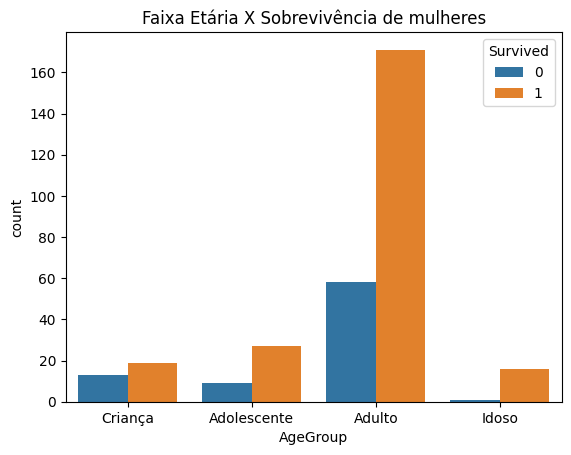

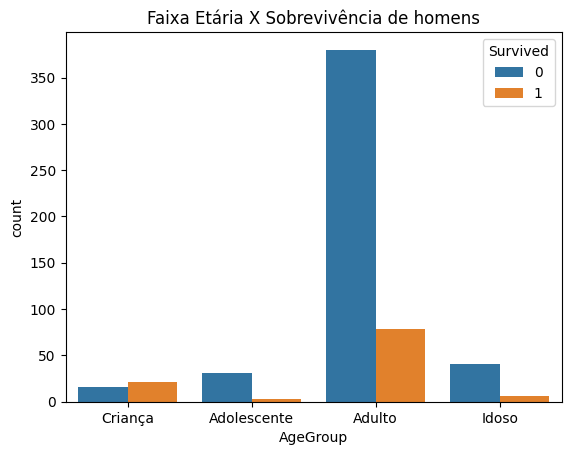

                           Morreram  Sobreviveram  Total  % Sobrevivência
Faixa etária das mulheres                                                
Criança                          13            19     32             59.4
Adolescente                       9            27     36             75.0
Adulto                           58           171    229             74.7
Idoso                             1            16     17             94.1
Total                            81           233    314             74.2
                         Morreram  Sobreviveram  Total  % Sobrevivência
Faixa etária dos homens                                                
Criança                        16            21     37             56.8
Adolescente                    31             3     34              8.8
Adulto                        380            79    459             17.2
Idoso                          41             6     47             12.8
Total                         468           109   

In [ ]:
# Cria um dataFrame só com as mulheres e outro só com os homens
mulheres = df_age_groups[df_age_groups['Sex'] == 'female']
homens = df_age_groups[df_age_groups['Sex'] == 'male']

# Plota o gráfico da distribuição de sobrevivência das mulheres separadas por faixa etária
sns.countplot(data=mulheres, x='AgeGroup', hue='Survived')
plt.title("Faixa Etária X Sobrevivência de mulheres")
plt.show()

# Plota o gráfico da distribuição de sobrevivência dos homens separados por faixa etária
sns.countplot(data=homens, x='AgeGroup', hue='Survived')
plt.title("Faixa Etária X Sobrevivência de homens")
plt.show()

survival_table_women = pd.crosstab(
    index=mulheres['AgeGroup'],
    columns=mulheres['Survived'],
    margins=True,  # Adiciona totais
    margins_name="Total"
)
# Renomear colunas para melhor interpretação
survival_table_women.columns = ['Morreram', 'Sobreviveram', 'Total']
survival_table_women.index.name = 'Faixa etária das mulheres'

# Adicionar coluna de porcentagem de sobrevivência
survival_table_women['% Sobrevivência'] = (survival_table_women['Sobreviveram'] / survival_table_women['Total'] * 100).round(1)

survival_table_men = pd.crosstab(
    index=homens['AgeGroup'],
    columns=homens['Survived'],
    margins=True,  # Adiciona totais
    margins_name="Total"
)
# Renomear colunas para melhor interpretação
survival_table_men.columns = ['Morreram', 'Sobreviveram', 'Total']
survival_table_men.index.name = 'Faixa etária dos homens'

# Adicionar coluna de porcentagem de sobrevivência
survival_table_men['% Sobrevivência'] = (survival_table_men['Sobreviveram'] / survival_table_men['Total'] * 100).round(1)

print(survival_table_women)
print(survival_table_men)

Aqui analisamos que as mulheres tiveram uma taxa de sobrevivência muito maior do que os homens em todas as faixas etárias, exceto com as crianças. Isso corrobora com a análise que fizemos anteriormente apenas por sexo onde as mulheres no geral tinham ~74% de taxa de sobrevivência enquanto que homens tinham apenas ~18%.

A diferença das taxas de sobrevivência no geral e a pequena diferença mostrada no contexto das crianças de ambos o sexos nos indica que essas taxas foram influenciadas pela prioridade de salvamento de mulheres e crianças, já que com pouca idade não existe uma diferença grande na sobrevivência em ambos os gêneros.

Isso demonstra de forma mais embasada como a prioridade de salvamento aumenta e muito as chances de sobrevivência.

No gráfico a seguir, conseguimos extrair que houve prioridade para o salvamento de famílias.



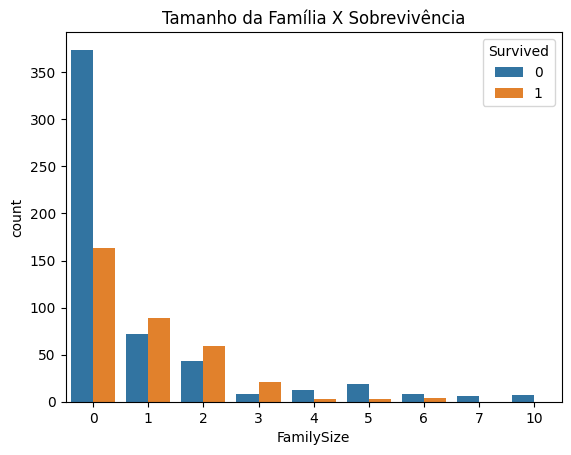

In [ ]:
# Relação de tamanho da família com a sobrevivência
df['FamilySize'] = df['SibSp'] + df['Parch']

sns.countplot(x='FamilySize', hue='Survived', data=df)
plt.title("Tamanho da Família X Sobrevivência")
plt.show()

Pessoas sozinhas tiveram o maior número disparado de mortes (>350), já pessoas acompanhadas de 1 à 3 pessoas tiveram taxas de sobrevivências melhores.

Porém, a partir de famílias de 4 pessoas para cima, as taxas de mortalidade foram maiores, muito possivelmente indicando que famílias grandes enfrentaram dificuldade na evacuação coordenada.

E como era de se esperar com base no que vimos anteriormente, passageiros que pagaram menos no preço da passagem (classe 3), tiveram uma mortalidade maior, enquanto passageiros que pagaram mais tinham mais chances de sobreviver, embora ela não fosse 100% garantida, como podemos ver no gráfico houve duas exceções, uma entre 200-300, e uma próxima de 500.



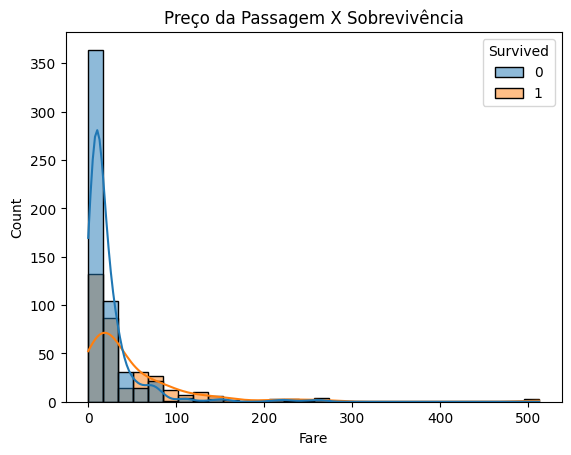

In [ ]:
# Relação de preço da passagem com sobrevivência
sns.histplot(data=df, x='Fare', hue='Survived', bins=30, kde=True)
plt.title("Preço da Passagem X Sobrevivência")
plt.show()

No geral, tudo isso indica que a desigualdade econômica foi sim um fator determinante na sobrevivência ou não dos passageiros.

Nesses próximos dois gráficos, podemos enxergar que o local de embarque S foi o que teve a maior quantidade de pessoas, e também o com maior número de não sobreviventes.

Já o ponto de embarque C teve uma taxa de sobrevivência maior que de mortalidade das pessoas que embarcaram por ele.





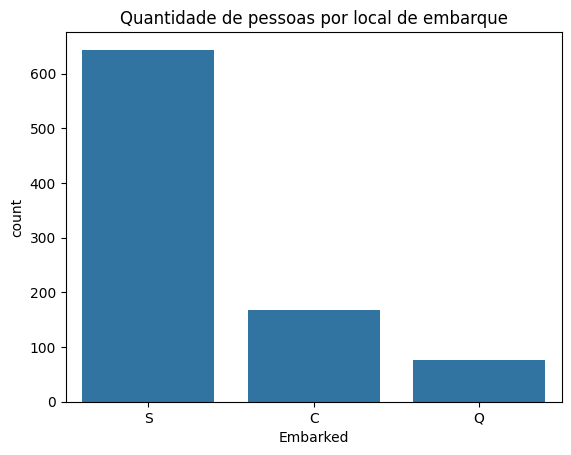

In [ ]:
# Quantidade de pessoas que embarcaram em cada local
sns.countplot(x='Embarked', data=df)
plt.title("Quantidade de pessoas por local de embarque")
plt.show()

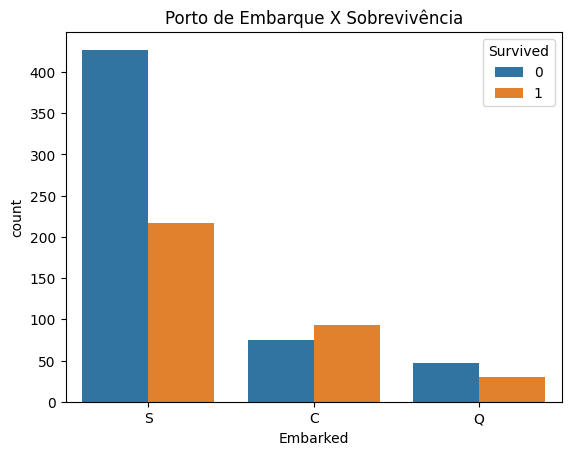

In [ ]:
# Relação do local de embarque com a sobrevivência
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title("Porto de Embarque X Sobrevivência")
plt.show()

Com base nas nossas análises anteriores, isso tudo possivelmente indica que o ponto de embarque S foi acessado em sua maioria por pessoas da classe 3, que tinham condições econômicas inferiores, enquanto o ponto de embarque C possivelmente foi acessado por pessoas da classe 1, que tinham condições financeiras melhores.

Pra encerrar, uma imagem muito braba do Ronaldinho


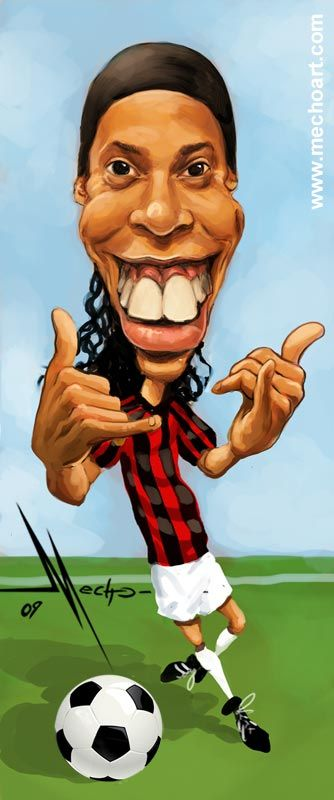